# Lesson 4.1: Linear Regression - Case Study Intro - & Exploratory Data Analysis

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to revisit the _linear regression_ case study we looked at in the first unit but with a larger dataset. We will dive deeper into the _exploratory data analysis_ process for numerical variables, to identify the data cleaning and some data processing operations we would perform.

---

> **Case Study: [Healthcare for all](files_for_lesson_and_activities/unit4_case_study.md)**

### Setup

- All previous set up

### Learning Objectives

After this lesson, students will be able to:

- Translate the business problem into Data Analysis tasks (using linear regression)
- Conduct Exploratory Data Analysis (_EDA_) to understand the nature of available data
- Identify data cleaning and data processing operations on **numerical** variables

---

### Lesson 1 key concepts

> :clock10: 20 min

- Introduce the business problem again (this time the data has more features and rows)
- Checking numerical and categorical variables and correcting data types
- Conduct exploratory data analysis ( `EDA` ) - 1

      - Analyze numerical variables
      - Identify the changes to be made


Code Sample: Importing data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#importing data
data = pd.read_csv('./files_for_lesson_and_activities/unit4.csv') # this file is in files_for_lesson_and_activities folder
data.head(2)

,Unnamed: 0,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,NaN,479,635,3,2,307,318,349,378,12883,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667


In [3]:
data.shape

(90569, 29)

In [4]:
# Checking for null values
nulls = pd.DataFrame(data.isna().sum()/len(data))

In [5]:
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
2,PVASTATE,0.984708
5,RECP3,0.979761
19,VETERANS,0.891287
9,HOMEOWNR,0.232431
8,INCOME,0.222847
27,TIMELAG,0.106582
6,GENDER,0.030860
7,DOMAIN,0.024026
26,NGIFTALL,0.000000
18,IC5,0.000000


In [6]:
# Check the numerical variables
numericals = data.select_dtypes(np.number)
numericals.head(3)

,Unnamed: 0,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481


- The `INCOME` might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.
- In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.
- We will use a similar method for the column `TIMELAG` .
- Pay attention to how we interpreting the different plots to make decisions in the next steps.

<AxesSubplot:>

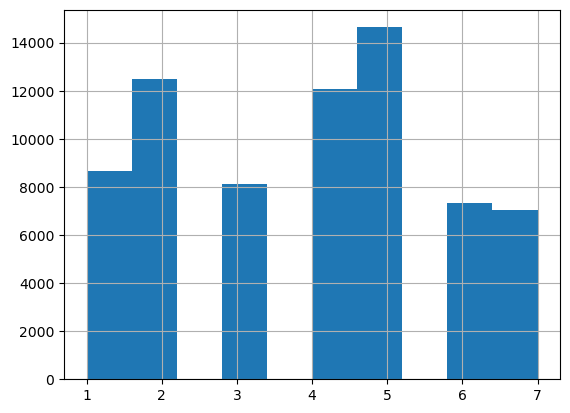

In [7]:
# working with INCOME column EDA + Data cleaning
data['INCOME'].hist()

- Looking at the histogram, we can see we need to replace the missing values first.
- In the previous lessons, we talked about replacing null values with mean and median and some other constant value. In the later lessons, we will look at methods different than filling with constants (mean and median).

# 4.01 Activity 1

Refer to `files_for_activities/unit4.csv` file.

1. How many ways exist to cope with the null values? When should you use each one?
2. What would you do with `null` values of the field GENDER?
3. The `Homeownership` has two values [ `H` = Homeowner, `U` = Unknown]. Fill the null values accordingly.

1. How many ways exist to cope with the null values? When should you use each one?

- **Drop**: Data can't be obtained, not a lot of entries (rows) or a lot of `NaN` s in the columns (columns)
- **Replace**: We have some other information that tells us we can do this, even if it is not the missing information. For example, if the data follow an approximately normal distribution, we might want to substitute the missing values with the mean. You always need to have something that "tells you" that you can replace the data.

2. What would you do with `null` values of the field GENDER?

In [186]:
data.GENDER.isna().sum()

2795

In [187]:
gender_is_null = data.GENDER.isnull()

In [188]:
data.drop(gender_is_null.index)

,Unnamed: 0,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT


3.The Homeownership has two values [ H = Homeowner, U = Unknown]. Fill the null values accordingly.

In [189]:
data.HOMEOWNR.fillna('U')

0        U
1        H
2        U
3        U
4        H
        ..
90564    H
90565    U
90566    H
90567    U
90568    U
Name: HOMEOWNR, Length: 90569, dtype: object

### Lesson 2 key concepts

> :clock10: 20 min

Cleaning numerical variables

- Imputing null values
- Fixed values technique vs. interpolation technique


Code Sample: Interpolation Method

<AxesSubplot:>

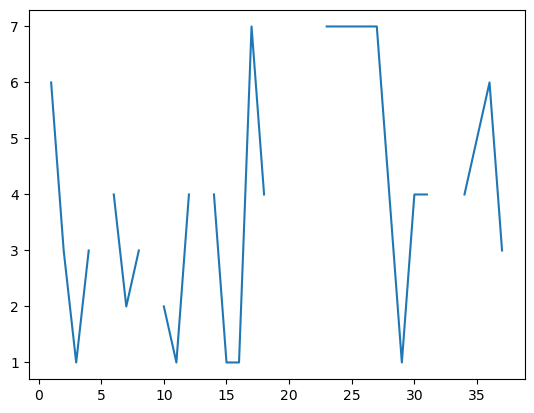

In [8]:
# How interpolation works
data['INCOME'][0:40].plot()  # To check how interpolation would fill the missing values

In [9]:
new_income_data = data['INCOME'][0:40].interpolate(method='linear')

In [10]:
# new_income_data = data['INCOME'][0:40].interpolate(method='akima')  # Other methods that can be used
# new_income_data = data['INCOME'][0:40].interpolate(method='polynomial', order=3)  # Other methods that can be used

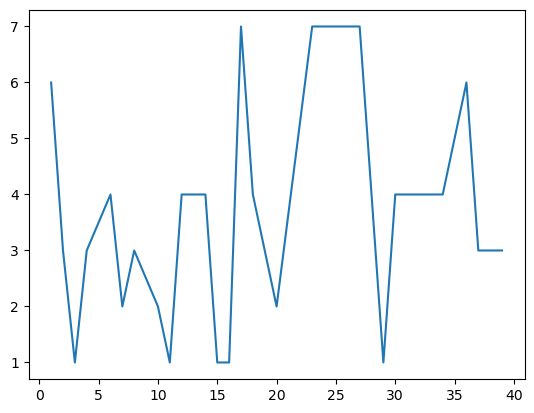

In [11]:
new_income_data.plot()
plt.show()

In [12]:
data['INCOME']

0        NaN
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
90564    6.0
90565    NaN
90566    7.0
90567    NaN
90568    5.0
Name: INCOME, Length: 90569, dtype: float64

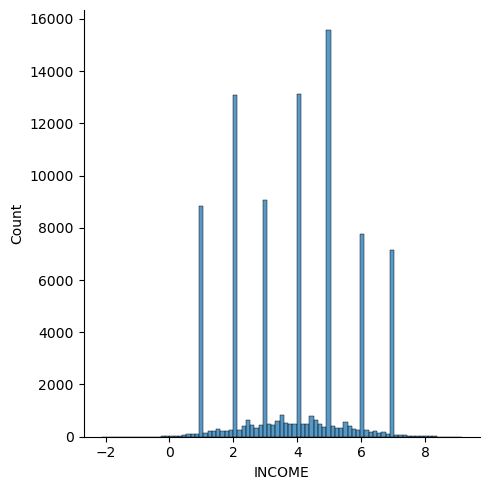

In [13]:
# Test what does the distribution look like after we have used interpolation method
points = data['INCOME'].interpolate(method='akima')
sns.displot(points[1:])   # We are using the index __1:__ as first value was NaN

- It is important to compare the results with other methods and then choose the best one.

<AxesSubplot:xlabel='INCOME', ylabel='Density'>

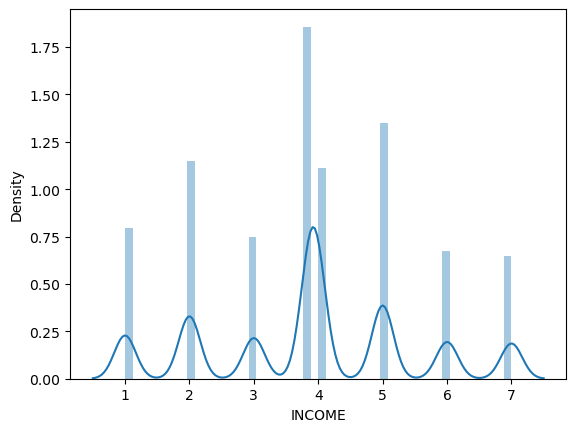

In [14]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.distplot(points2)

In [15]:
# Note that unlike "np.mean()" , "np.median()" doesn't work if there are any null values in the column
median = np.median(data['INCOME'].fillna(0))

<AxesSubplot:xlabel='INCOME', ylabel='Density'>

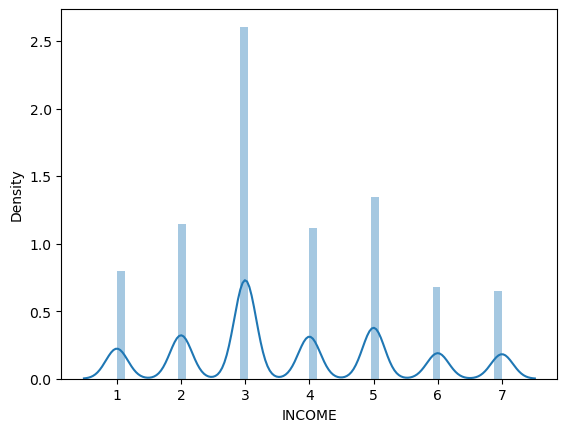

In [16]:
points3 = data['INCOME'].fillna(median)
sns.distplot(points3)

In [17]:
# Finally choosing mean method
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

# 4.01 Activity 2

Interpolation isn't a bad method to replace `NaN`s but you might find some other solutions that are more efficient. Can you think of at least one? Implement your proposal.

**Hint**: Analytically, when you have `NaN`s, you work with them as if they were a test set.

In [18]:
from sklearn.linear_model import LinearRegression

In [26]:
X = data[~data.INCOME.isnull()][['HV1', 'IC1']]
y = data[~data.INCOME.isnull()][['INCOME']]

In [27]:
X_nulls = data[~data.INCOME.isnull()][['HV1', 'IC1']]

In [28]:
X_nulls

,HV1,IC1
0,479,307
1,5468,1088
2,497,251
3,1000,386
4,576,240
...,...,...
90564,733,285
90565,988,433
90566,1679,806
90567,376,263


In [29]:
model = LinearRegression().fit(X, y)
income_pred = model.predict(X_nulls)
income_pred = np.round(income_pred)
print("Length of predictions: ", len (income_pred))

Length of predictions:  90569


In [30]:
data.loc[data.INCOME.isnull(), 'INCOME'] = income_pred

### Lesson 3 key concepts

> :clock10: 20 min

- Cleaning numerical variables

      - Using data transformations


Code Sample: Working with INCOME column EDA + Data cleaning

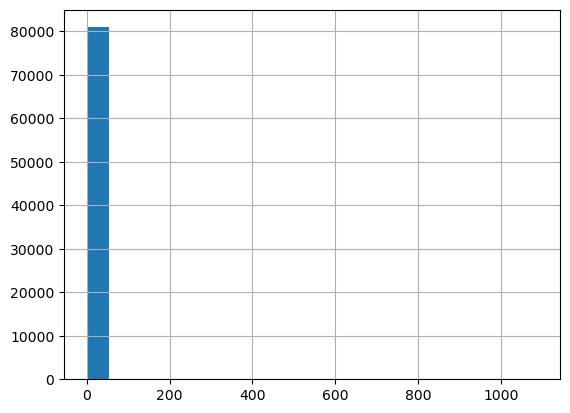

In [31]:
# Working with INCOME column EDA + Data cleaning
data['TIMELAG'].hist(bins=20)
plt.show()

In [ ]:
# skewness

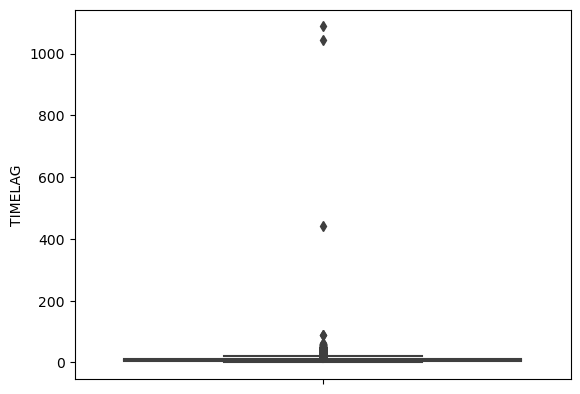

In [32]:
sns.boxplot(y=data['TIMELAG'])
plt.show()

- Data in the Timelag column is highly skewed (positive skewness).
- Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data.
- We will try some transformations.

In [33]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

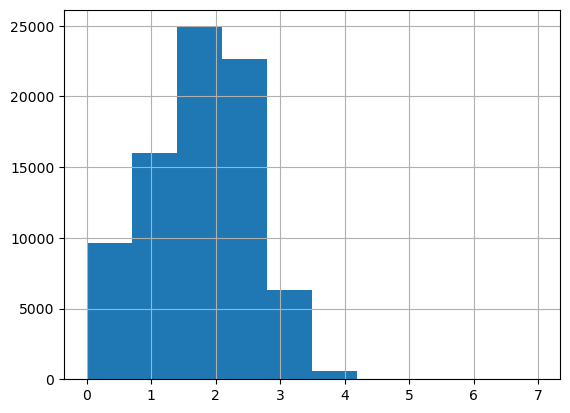

In [34]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

In [ ]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

In [ ]:
# Use log transformation to replace the values of the column now
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

# 4.01 Activity 3

Logarithmic transformation is one of the most common transformations when it comes to visualization. Can you guess why?

A logarithmic scale is common to visualize exponential data as they are the inverse function of each other, so the result would be a linear visualization. This is needed because we don't visualize exponential functions properly otherwise. As an example, you can see some corona virus visualizations, like [this one](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.1-COVID-Logarithmicvslinear.png). Check the log transform with the `IC`-n columns.

### Lesson 4 key concepts

> :clock10: 20 min

Cleaning numerical variables

- Filtering/subsetting data
- Using filter function
- Removing outliers


Code Sample

- Even after using the transformation, there is still some skewness in the column `TIMELAG` . We will remove the outliers only from the right side of the distribution plot.

In [35]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['TIMELAG'], 75) - np.percentile(data['TIMELAG'], 25)
upper_limit = np.percentile(data['TIMELAG'], 75) + 1.5*iqr
print(upper_limit)

nan


In [36]:
new_df = data[data['TIMELAG'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

0

- `filter` function (syntax is very similar to the `map` functions).

In [37]:
list(filter(lambda x: x % 2 == 0, lst))

[0, 2, 4, 6, 8, 10]

In [38]:
# Using filters
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

0

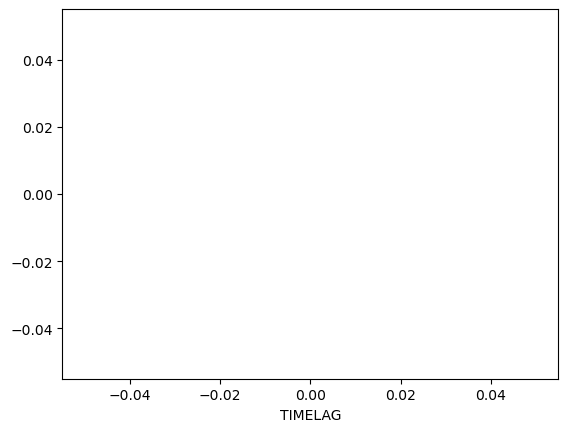

In [39]:
# Removing outliers
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# 4.01 Activity 4

- What is the difference between **map**, **filter**, and **reduce**?
- Use **map**, **filter** and **reduce** to get the sum of the square root of the odd numbers between 0 and 100.

In [40]:
from functools import reduce

In [41]:
lst = list(range(100))

In [42]:
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [43]:
reduce(lambda a,b: a*b, lst)

0

# Lab | Basic Data Cleaning and EDA

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is and _claim amounts_. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

**Some business Objectives for the case study could be**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df` (i.e. `customer_df = pd.readcsv("")`)
3. First, look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (**Hint**: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for *NaN* values. Decide what (if anything) you will need to do with them.

### LAB Solution:

1. Import the necessary libraries.

In [ ]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.

In [ ]:
customer_df = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

3. First, look at its main features (`head`, `shape`, `info`).

In [ ]:
customer_df.head(3)

In [ ]:
customer_df.info()

In [ ]:
customer_df.shape

4. Rename the columns so they follow the PE8 (snake case).

In [ ]:
customer_df.columns = [col.replace(" ", "_").lower() for col in customer_df]

5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. **Hint**: One thing you can try is to change date column to datetime format.

In [ ]:
customer_df['number_of_open_complaints'].unique()

In [ ]:
customer_df['number_of_open_complaints'] = customer_df['number_of_open_complaints'].astype('object')

In [ ]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

6. Plot a correlation matrix, and comment on what you observe.

In [ ]:
correlation_matrix = customer_df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)

7. Plot every continuous variable. Comment what you can see in the plots.

In [ ]:
numericals = customer_df.select_dtypes(np.number)
for col in numericals.columns:
    sns.displot(numericals[col])
    plt.show()

8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column `customer_id` before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column `customer_id` required. **Hint**: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [ ]:
categoricals = customer_df.select_dtypes(np.object)
categoricals = categoricals.drop(['customer'], axis=1)
for col in categoricals.columns:
    sns.barplot(x = categoricals[col].value_counts().index, y = categoricals[col].value_counts())
    plt.show()

9. Look for outliers in the continuous variables. (**Hint**: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

In [ ]:
for col in numericals.columns:
    sns.boxplot(numericals[col])
    plt.show()

10. Check all columns for _NaN_ values. Decide what (if anything) you will need to do with them.

In [ ]:
customer_df.isna().sum()